# Device

In [ ]:
from genaibook.core import get_device
device = get_device()
print(f'Device: {device}')

# Stable Diffusion

In [8]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", 
                                                torch_dtype=torch.float16, 
                                                variant='fp16'
).to(device)




Device: mps


Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 10.46it/s]


100%|██████████| 50/50 [00:18<00:00,  2.69it/s]


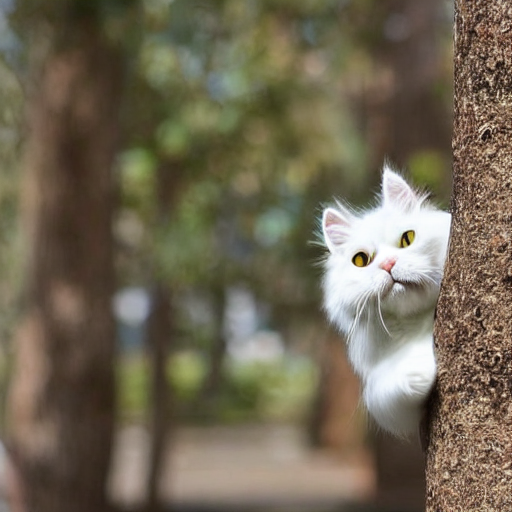

In [11]:
prompt = "A Persian white cat with brown spots on a tree."
pipe(prompt).images[0]

# Transformer

In [12]:
from transformers import pipeline

prompt = "The video game is overwhelmingly popular and has a large player base."
classifier = pipeline("text-classification", device=device)
classifier(prompt)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps


[{'label': 'POSITIVE', 'score': 0.9998179078102112}]

In [13]:
from transformers import set_seed
set_seed(10)

generator = pipeline("text-generation", device=device)
prompt = "It was a dark and stormy"
generator(prompt)[0]["generated_text"]

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'It was a dark and stormy afternoon, with very dark clouds over the horizon, and very strong showers in the direction of our village. As you see, a group of our people had arrived in Kwanai at the start of the year,'

# Audio Generation

In [15]:
pipe = pipeline("text-to-audio", model="facebook/musicgen-small", device=device)
data = pipe("classical music piece")
print(data)

/Users/yang/Projects/GenAIBook/venv/lib/python3.13/site-packages/transformers/models/encodec/modeling_encodec.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)
Config of the text_encoder: <class 'transformers.models.t5.modeling_t5.T5EncoderModel'> is overwritten by shared text_encoder config: T5Config {
  "_name_or_path": "t5-base",
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 3072,
  "d_kv": 64,
  "d_model": 768,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type":

{'audio': array([[[-0.01504295, -0.01465479, -0.0141102 , ...,  0.01574768,
          0.01708896,  0.01549136]]], dtype=float32), 'sampling_rate': 32000}


In [17]:
import IPython.display as ipd
display(ipd.Audio(data['audio'][0], rate=data['sampling_rate']))